# Metadata Ontology

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

os.chdir('../../')
import synthesized

%matplotlib

Using matplotlib backend: MacOSX


## Data Metas
- Nominal
  - String
- Ordinal
  - OrderedString
  - Boolean
- Affine
  - Date
- Scale
  - TimeDelta
  - Int
- Ring
  - BoolInt
  - Float


In [12]:
a = np.random.normal(500, 50, size=1000).astype(int)
d = a % 336
y = a//336 + 2019;y
m = d//28 + 1
d = d % 28 + 1

df = pd.DataFrame({
    'string': np.random.choice(['A','B','C','D','E'], size=1000),
    'bool': np.random.choice([False, True], size=1000).astype('?'),
    'date': pd.to_datetime(pd.DataFrame({'year':y, 'month':m, 'day':d})),
    'int': [n for n in [0, 1, 2, 3, 4, 5] for i in range([50, 50, 0, 200, 400, 300][n])],
    'float': np.random.normal(0.0, 1.0, size=1000),
    'int_bool': np.random.choice([0, 1], size=1000)
}); df

,string,bool,date,int,float,int_bool
0,B,True,2020-07-27,0,-0.254977,1
1,C,False,2020-06-19,0,0.249849,0
2,C,False,2020-05-18,0,1.234770,1
3,A,False,2020-09-05,0,-1.062753,1
4,C,False,2020-08-06,0,1.233007,0
...,...,...,...,...,...,...
995,C,False,2020-07-07,5,-0.124213,1
996,C,False,2020-07-27,5,0.305679,0
997,B,False,2020-11-04,5,-0.475760,0
998,D,False,2020-07-28,5,0.896004,1


### Nominal
#### String

In [13]:
from synthesized.metadata_new import String

In [14]:
meta_string = String(name='string')
meta_string.extract(df)
print(meta_string)
print('Categories:', meta_string.categories)

<Nominal[U]: String(name=string)>
Categories: ['B', 'C', 'A', 'E', 'D']


### Ordinal
#### OrderedString

In [15]:
from synthesized.metadata_new import OrderedString

In [16]:
meta_ordered = OrderedString(name='string', categories=['A','B','C','D','E'])
meta_ordered.extract(df)
print(meta_ordered)
print('Categories:', meta_ordered.categories)
print('Min:', meta_ordered.min, 'Max:', meta_ordered.max)

<Ordinal[U]: OrderedString(name=string)>
Categories: ['A', 'B', 'C', 'D', 'E']
Min: A Max: E


### Affine
#### Date

In [17]:
from synthesized.metadata_new import Date

In [18]:
meta_date = Date(name='date')
meta_date.extract(df)
print('Meta:', meta_date)
print('Categories:', '[...]')
print('Min:', meta_date.min, 'Max:', meta_date.max)
print('Unit Meta:', meta_date.unit_meta)
print('Unit_precision:', meta_date.unit_meta.precision)

Meta: <Affine[M8[D]]: Date(name=date)>
Categories: [...]
Min: 2019-12-18 Max: 2020-12-17
Unit Meta: <Scale[m8[D]]: TimeDeltaDay(name=diff_date)>
Unit_precision: 1 days


### Scale

#### Integer

In [19]:
from synthesized.metadata_new import Integer

In [20]:
meta_int = Integer(name='int')
meta_int.extract(df)
print('Meta:', meta_int)
print('Categories:', meta_int.categories)
print('Min:', meta_int.min, 'Max:', meta_int.max)
print('Unit Meta:', meta_int.unit_meta)
print('Unit_precision:', meta_int.unit_meta.precision)

Meta: <Scale[i8]: Integer(name=int)>
Categories: [0, 1, 3, 4, 5]
Min: 0 Max: 5
Unit Meta: <Scale[i8]: Integer(name=int)>
Unit_precision: 1


### Ring

#### Float

In [21]:
from synthesized.metadata_new import Float

In [22]:
meta_float = Float(name='float')
meta_float.extract(df)
print('Meta:', meta_float)
print('Categories:', [])
print('Min:', meta_float.min, 'Max:', meta_float.max)
print('Unit Meta:', meta_float.unit_meta)
print('Unit_precision:', meta_float.unit_meta.precision)

Meta: <Ring[f8]: Float(name=float)>
Categories: []
Min: -3.0039198839549526 Max: 2.9292503867301165
Unit Meta: <Ring[f8]: Float(name=float)>
Unit_precision: 0.0


#### IntBool

In [23]:
from synthesized.metadata_new import IntegerBool

In [24]:
meta_intbool = IntegerBool(name='int_bool')
meta_intbool.extract(df)
print('Meta:', meta_intbool)
print('Categories:', meta_intbool.categories)
print('Min:', meta_intbool.min, 'Max:', meta_intbool.max)
print('Unit Meta:', meta_intbool.unit_meta)
print('Unit_precision:', meta_intbool.unit_meta.precision)

Meta: <Ring[i8]: IntegerBool(name=int_bool)>
Categories: [0, 1]
Min: 0 Max: 1
Unit Meta: <Ring[i8]: IntegerBool(name=int_bool)>
Unit_precision: 1


In [25]:
from synthesized.metadata_new import MetaExtractor, DataFrameMeta

In [26]:
df_meta = MetaExtractor.extract(df)
print(df_meta)
print('Children: ')
for c in df_meta.children:
    print(' ', c)

DataFrameMeta(name=df)
Children: 
  <Nominal[U]: String(name=string)>
  <Ordinal[?]: Bool(name=bool)>
  <Affine[M8[D]]: Date(name=date)>
  <Scale[i8]: Integer(name=int)>
  <Ring[f8]: Float(name=float)>
  <Ring[i8]: IntegerBool(name=int_bool)>


## Models

In [27]:
from synthesized.metadata_new.model import Histogram

### Histogram

In [28]:
hist_string = Histogram.from_meta(meta_string)
print(hist_string)
print('Categories:', hist_string.categories)

<Nominal[U]: Histogram(name=string)>
Categories: ['B', 'C', 'A', 'E', 'D']


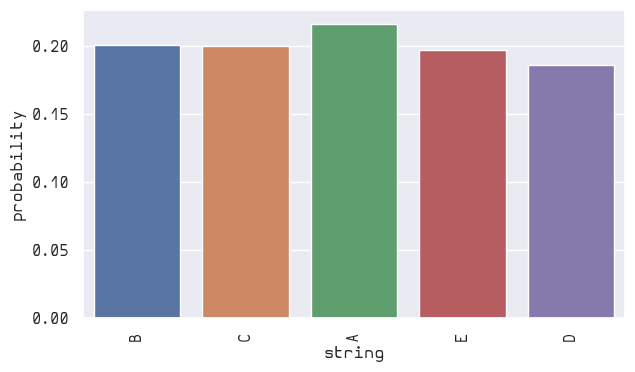

In [29]:
hist_string.fit(df)
hist_string.plot(context='notebook', font='hermit')

In [30]:
hist_int = Histogram.from_meta(meta_int)
print(hist_int)
print('Categories:', hist_int.categories)

<Nominal[i8]: Histogram(name=int)>
Categories: [0, 1, 3, 4, 5]


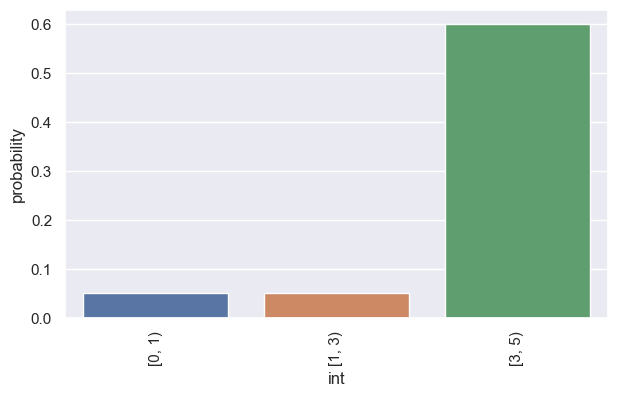

In [31]:
hist_int = Histogram.bin_affine_meta(meta_int, max_bins=3)
hist_int.fit(df)
hist_int.plot()

In [32]:
hist_date = Histogram.from_meta(meta_date)
print(hist_date)
print('Categories:', '[...]')

<Nominal[M8[D]]: Histogram(name=date)>
Categories: [...]


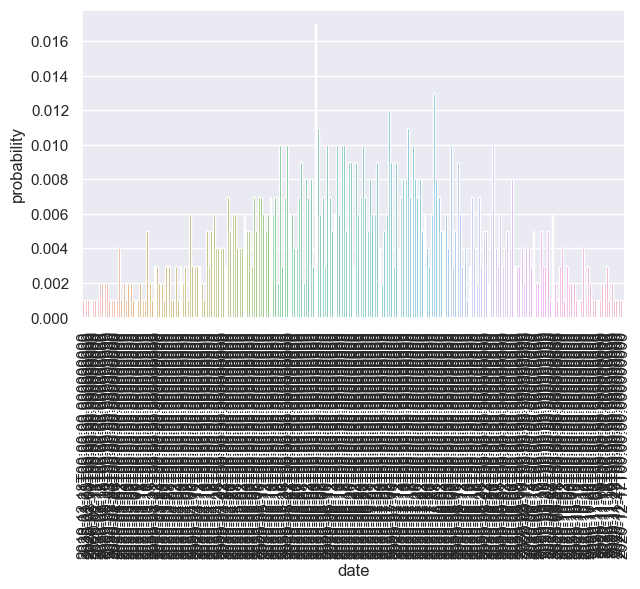

In [33]:
hist_date.fit(df)
hist_date.plot()

<Nominal[interval[M8[ns]]]: Histogram(name=date)>


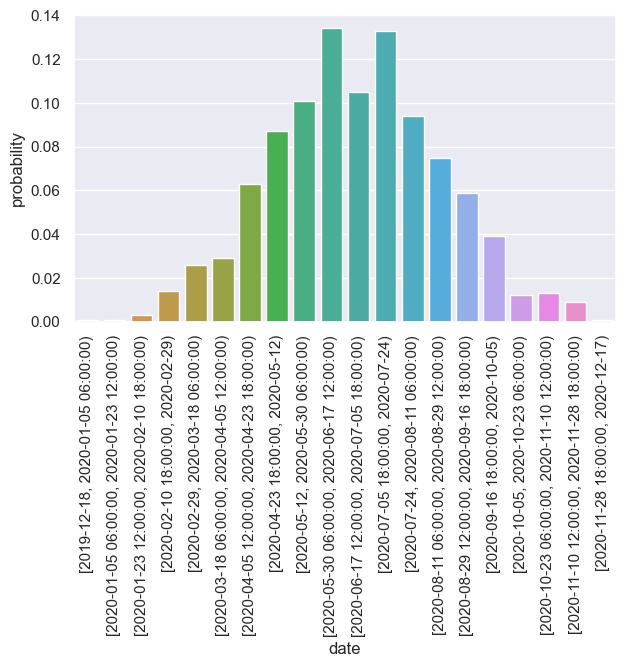

In [34]:
hist_date = Histogram.bin_affine_meta(meta_date, max_bins=20)
print(hist_date)
hist_date.fit(df)
hist_date.plot()

<Nominal[interval[f8]]: Histogram(name=float)>


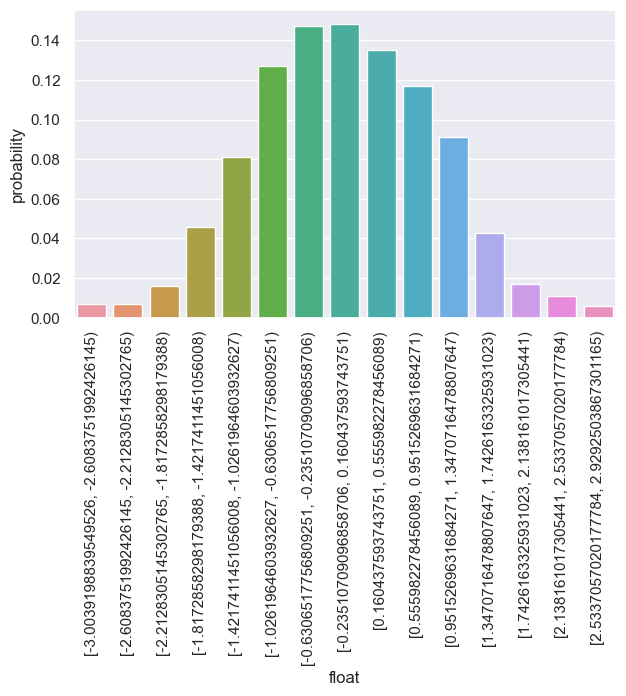

In [35]:
hist_float = Histogram.bin_affine_meta(meta_float, max_bins=15)
print(hist_float)
hist_float.fit(df).plot()

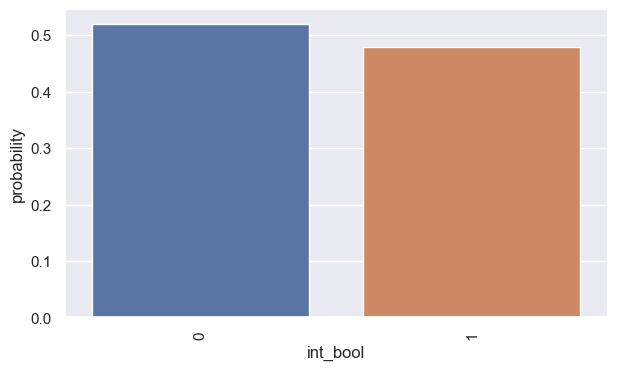

In [36]:
Histogram.from_meta(meta_intbool).fit(df).plot()

### Kernel Density Estimate

In [37]:
from synthesized.metadata_new.model import KernelDensityEstimate

<Affine[M8[D]]: KernelDensityEstimate(name=date)>
Interpolate probabilities: p("2010-03-02") = [0.]


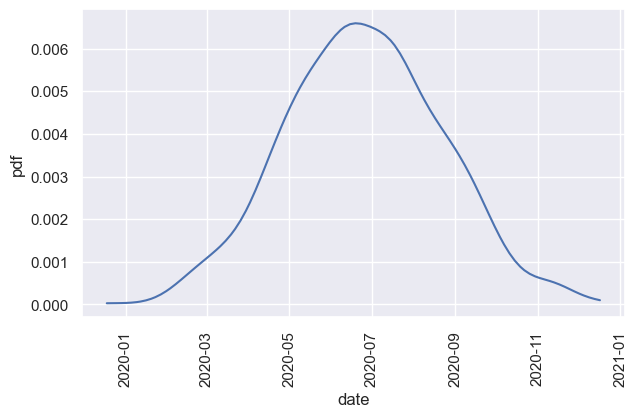

In [38]:
kde_date = KernelDensityEstimate.from_meta(meta_date)
print(kde_date)
kde_date.fit(df)
print('Interpolate probabilities: p("2010-03-02") =', kde_date.probability(np.datetime64('2010-03-02')))
kde_date.plot()

#### Creating Histograms from KDEs
Below is a common issue with histograms where some of the bin widths overlap with more points of data compared to neighbours, creating little "spikes" in the histograms. The issue can be easily solved with the model metas by specifying a precision (see the second histogram which is smoother).

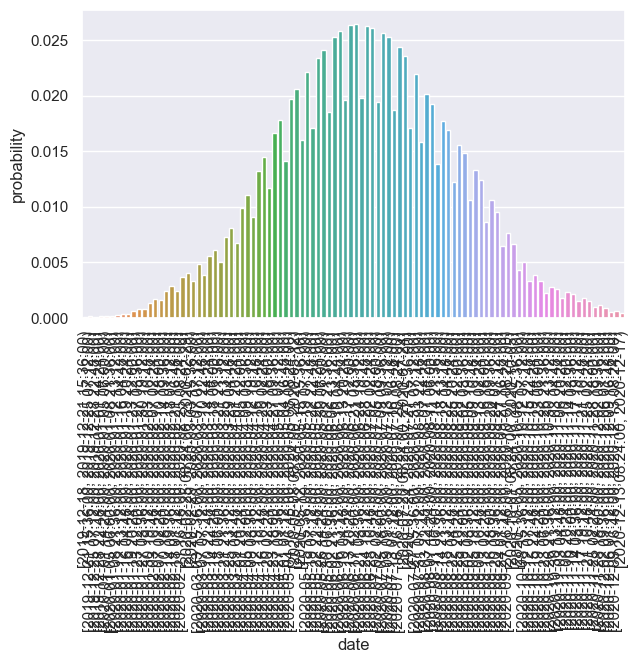

In [39]:
hist_kde_date = Histogram.bin_affine_meta(kde_date, max_bins=100)
hist_kde_date.plot()

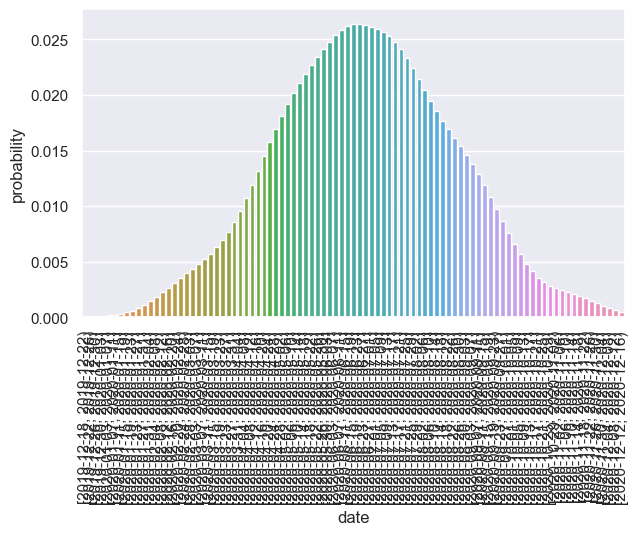

In [40]:
kde_date.unit_meta.precision = (hist_kde_date.categories.right.values.astype('M8[D]')
                                - hist_kde_date.categories.left.values.astype('M8[D]')).max()
hist_kde_date = Histogram.from_meta(kde_date)
hist_kde_date.plot()

In [41]:
with meta_date.expand(df):
    figs = [Histogram.from_meta(child).fit(df).plot() for child in meta_date.children]


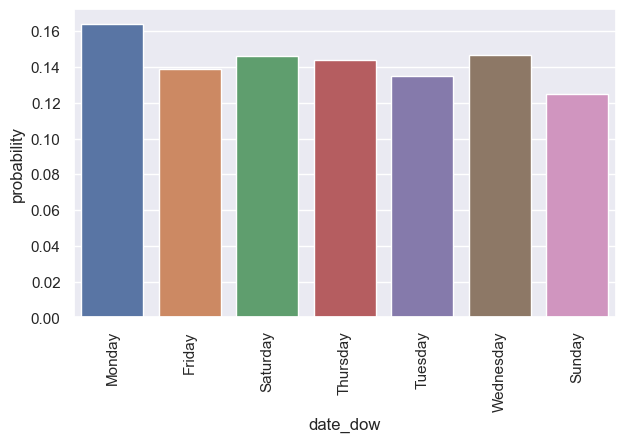

In [42]:
figs[0]